## Задание № 1. Считаем круги

* Посчитать количество кругов на картинке с помощью OpenCV

In [ ]:
import cv2 as cv
import numpy as np

In [ ]:
# выполняю задание на Colab-е. По какой-то причине cv.imshow здесь не запускается
# предлагает такой выход
from google.colab.patches import cv2_imshow

In [ ]:
file_image = '/content/drive/MyDrive/Работа с данными на Python/HW_7/bubbles_2.png'

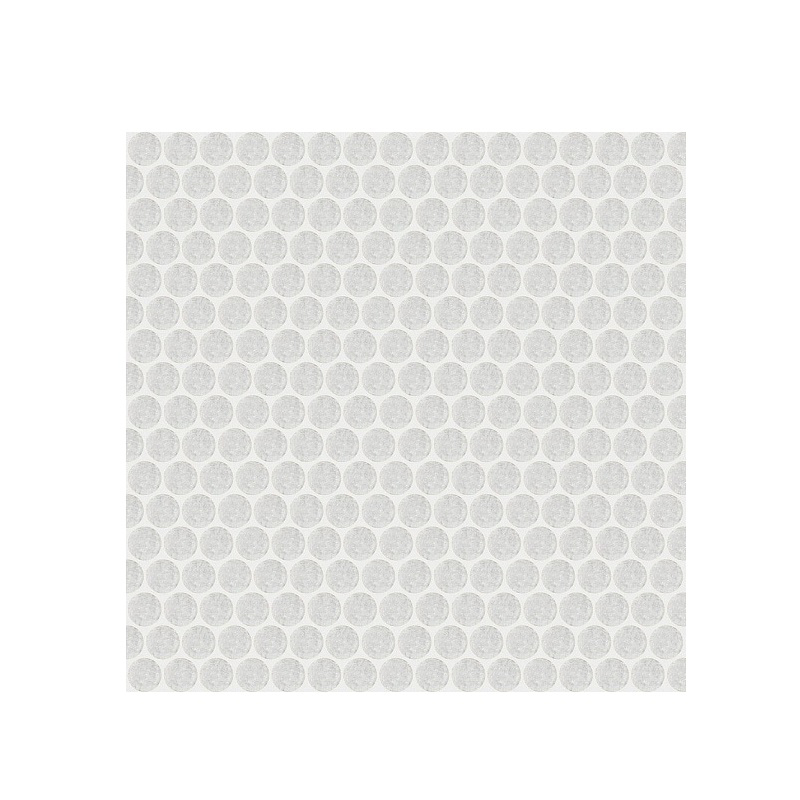

In [ ]:
image = cv.imread(file_image)  # Загружаем изображение
cv2_imshow(image)

In [ ]:
output = image.copy()

gray =  cv.cvtColor(image, cv.COLOR_BGR2GRAY) 

Найдено:  256 кругов


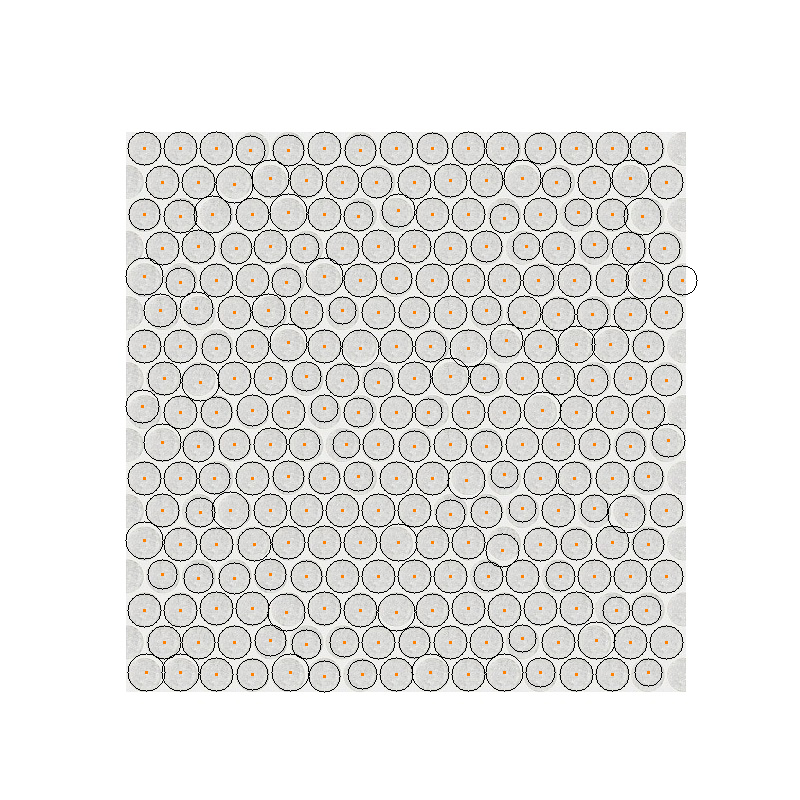

In [ ]:
circles = cv.HoughCircles(gray, cv.HOUGH_GRADIENT, 1, minDist = 20, param1=40, param2 = 20, minRadius = 10, maxRadius = 20)

if circles is not None:
    circles = np.round(circles[0, :]).astype("int") # 
    print('Найдено: ',len(circles), 'кругов')

    for (x, y, r) in circles:        
        cv.circle(output, (x, y), r, (0, 0, 0), 1)
        cv.rectangle(output, (x - 1, y - 1), (x + 1, y + 1), (0, 128, 255), -1)

    cv2_imshow(output)
    
else: print('Кругов нет')

## Задание № 2. Развешиваем картины

* Выделить все картины на фотографии
* Посчитать площадь картин. 
* Подписать площадь каждой картины на фотографии

In [ ]:
import sys
import numpy as np
import cv2 as cv

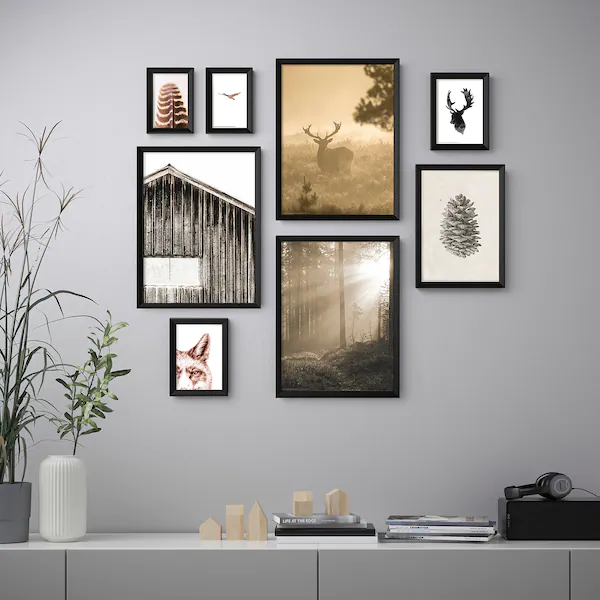

In [ ]:
file_image = '/content/drive/MyDrive/Работа с данными на Python/HW_7/pictures_2.jpg'

img = cv.imread(file_image)
cv2_imshow(img)

In [ ]:
hsv_min = np.array((0, 0, 0), np.uint8)
hsv_max = np.array((50, 200, 80), np.uint8)

hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
thresh = cv.inRange(hsv, hsv_min, hsv_max)

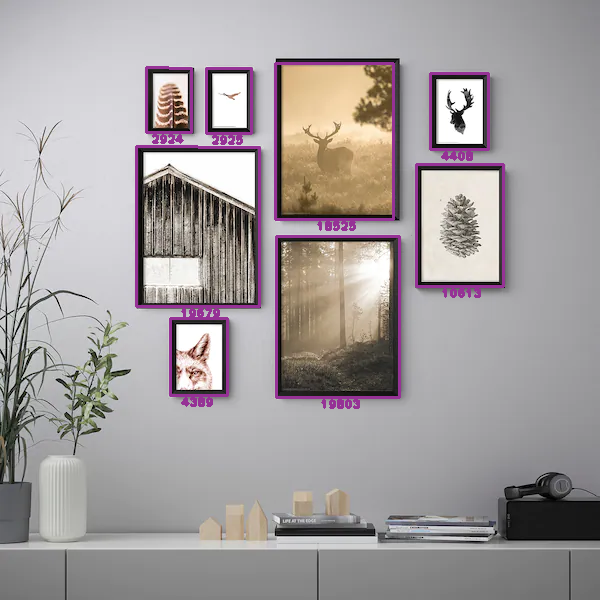

In [ ]:
contours0, hierarchy = cv.findContours(thresh.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

img = cv.imread(file_image)

for cnt in contours0:
    rect = cv.minAreaRect(cnt)
    box = cv.boxPoints(rect)
    box = np.int0(box)
    area = int(rect[1][0]*rect[1][1])
    if area > 1500 and area < 75000 and area != 6300 and area != 16100:
        cv.drawContours(img,[box],0,(150, 50, 150),2)
        indent = int(((box[3, 0] - box[1, 0])/10 - 3.5) * 5)
        cv.putText(img, str(area), (box[0, 0] + indent, box[0, 1] + 11),
                   cv.FONT_HERSHEY_PLAIN, 0.8, (150, 50, 150), 2) 

cv2_imshow(img)